In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#https://www.kaggle.com/datasets/camnugent/california-housing-prices/data

In [3]:
df = pd.read_csv("21-housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

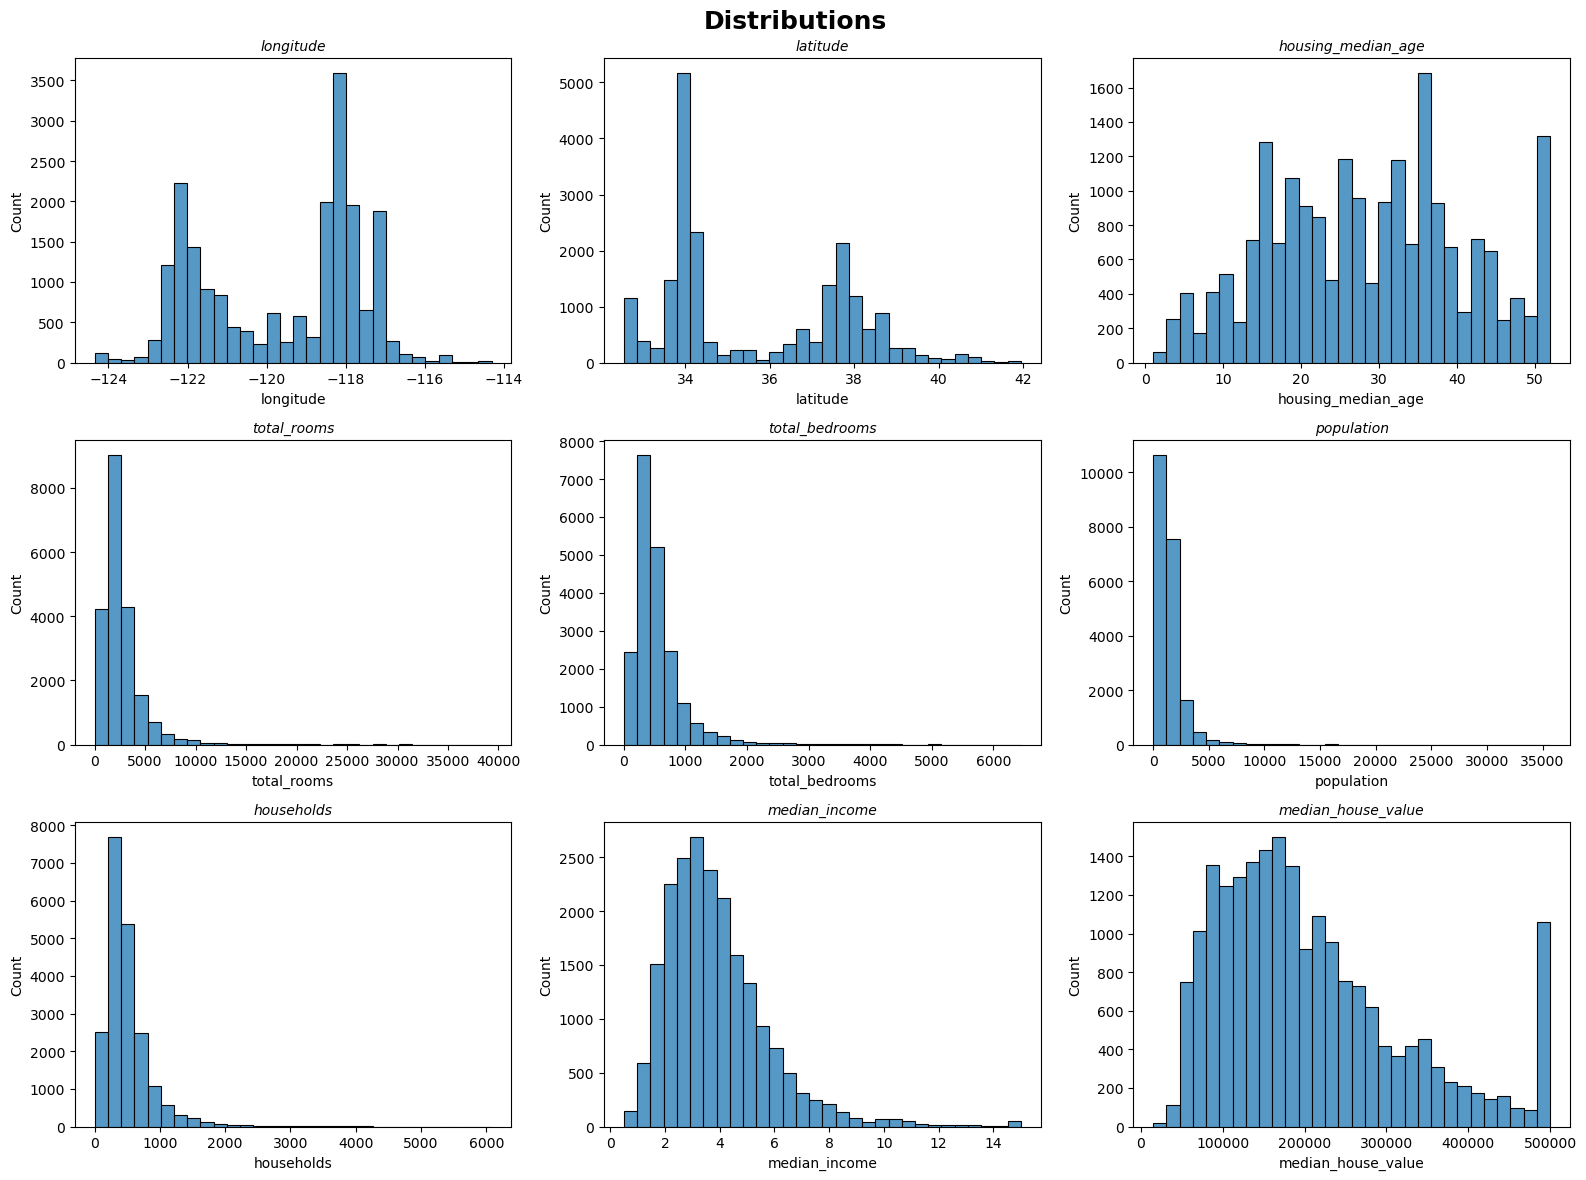

In [9]:
columns = ['longitude', 'latitude', 'housing_median_age',
           'total_rooms', 'total_bedrooms', 'population',
           'households', 'median_income', 'median_house_value']

# 3x3 subplot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
fig.suptitle('Distributions', fontsize=18, fontweight='bold')

for i, col in enumerate(columns):
    row = i // 3
    col_idx = i % 3
    ax = axes[row, col_idx]
    sns.histplot(data=df, x=col, kde=False, ax=ax, bins=30)
    ax.set_title(col, fontsize=10, fontstyle='italic')

plt.tight_layout() 
plt.show()

In [10]:
df.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [11]:
def find_outliers_iqr(df):
    outlier_summary = {}

    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = {
            'outlier_count': outliers.shape[0],
            'outlier_percentage': 100 * outliers.shape[0] / df.shape[0],
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

    return pd.DataFrame(outlier_summary).T.sort_values('outlier_count', ascending=False)

In [12]:
outliers_df = find_outliers_iqr(df)
print(outliers_df)

                    outlier_count  outlier_percentage   lower_bound  \
total_rooms                1287.0            6.235465  -1102.625000   
total_bedrooms             1271.0            6.157946   -230.500000   
households                 1220.0            5.910853   -207.500000   
population                 1196.0            5.794574   -620.000000   
median_house_value         1071.0            5.188953 -98087.500000   
median_income               681.0            3.299419     -0.706375   
longitude                     0.0            0.000000   -127.485000   
latitude                      0.0            0.000000     28.260000   
housing_median_age            0.0            0.000000    -10.500000   

                      upper_bound  
total_rooms           5698.375000  
total_bedrooms        1173.500000  
households            1092.500000  
population            3132.000000  
median_house_value  482412.500000  
median_income            8.013025  
longitude             -112.325000  
l

In [13]:
# i will only remove outliers in our target column which is median_house_value
# model tries to predict this value and outliers in target column may corrupt loss function and result in deviations
# of course outliers in input columns may corrupt the model as well but if we are using a decision tree based model
# such as gradients, forests etc it wouldn't hurt us much
# and we will preserve the most of the data 
# let's create two functions to compare how would it look like if we clean all data and only output column

In [14]:
def remove_outliers_target_only(df, target_col):
    Q1 = df[target_col].quantile(0.25)
    Q3 = df[target_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)].copy()


def remove_outliers_all_columns(df):
    df_clean = df.copy()
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean.copy()

In [15]:
# original data
print("Original data shape:", df.shape)

df_target_clean = remove_outliers_target_only(df, 'median_house_value')
print("Only target column cleaning shape:", df_target_clean.shape)

df_all_clean = remove_outliers_all_columns(df)
print("All columns cleaning shape:", df_all_clean.shape)

Original data shape: (20640, 10)
Only target column cleaning shape: (19569, 10)
All columns cleaning shape: (16725, 10)


In [16]:
# i am going to use only target column cleaning in this case for the reasons i mentioned
# if you want, you can train the model with these different dfs to compare the performance

In [17]:
df_target_clean.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [18]:
df_target_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19569.000000,19569.000000,19569.000000,19569.000000,19369.000000,19569.000000,19569.000000,19569.000000,19569.000000
mean,-119.562786,35.654159,28.352752,2619.977260,539.893335,1442.788952,501.394859,3.665568,190852.301906
std,2.005764,2.151007,12.497772,2183.419302,422.650225,1145.011369,383.396308,1.557927,95438.555669
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1438.000000,297.000000,797.000000,282.000000,2.522700,116200.000000
50%,-118.510000,34.270000,28.000000,2110.000000,437.000000,1181.000000,411.000000,3.441200,173200.000000
75%,-117.990000,37.730000,37.000000,3123.000000,648.000000,1749.000000,606.000000,4.572100,246700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,482200.000000


In [19]:
df_target_clean['total_bedrooms'] = df_target_clean['total_bedrooms'].fillna(df_target_clean['total_bedrooms'].median())

In [20]:
df_target_clean.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [21]:
df_target_clean['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     8552
INLAND        6519
NEAR OCEAN    2419
NEAR BAY      2074
ISLAND           5
Name: count, dtype: int64

In [22]:
# i will do one hot encoding for ocean proximity, so it is a better way to do that before train - test split
# since we are doing one hot encoding, if we were doing another encoding it would make sense to do after train-test split

In [23]:
df_target_clean = pd.get_dummies(df_target_clean, columns=['ocean_proximity'], drop_first=True)

In [24]:
X = df_target_clean.drop('median_house_value', axis=1)
y = df_target_clean['median_house_value']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15, test_size=0.3)

In [29]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [44]:
# i am going to skip scaling altogether since this is a tree based approach, but it will decrease the chances
# of other algorithms
# from sklearn.preprocessing import StandardScaler
# scaler = StandarScaler()
# i am not scaling longitude and latitude because they preserve location data
#cols_to_scale = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                 #'population', 'households', 'median_income']

#X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
#X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [32]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [33]:
#Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    "Graident BoostRegressor":GradientBoostingRegressor(),
    "Xgboost Regressor":XGBRegressor()
}

In [34]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('----------------------------------')
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 59377.1059
- Mean Absolute Error: 43858.3875
- R2 Score: 0.6104
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 58769.5473
- Mean Absolute Error: 43594.3639
- R2 Score: 0.6263
----------------------------------


Lasso
Model performance for Training set
- Root Mean Squared Error: 59377.1447
- Mean Absolute Error: 43859.0086
- R2 Score: 0.6104
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 58768.4623
- Mean Absolute Error: 43594.6688
- R2 Score: 0.6263
----------------------------------


Ridge
Model performance for Training set
- Root Mean Squared Error: 59381.1687
- Mean Absolute Error: 43864.6773
- R2 Score: 0.6104
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 58763.9613
- Mean Absolute Error: 43597.1429
- R2 Score: 0.6264
----------------------------------


K-Neighbor

In [35]:
#xgboost performs the best in test set

In [36]:
xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
randomized_cv = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=xgboost_params, cv=3, n_jobs=-1)

In [39]:
randomized_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.8, 1, 0.3,
                                                             0.4],
                                        'learning_rate': [0.1, 0.01],
                                        'max_depth': [5, 8, 12, 20, 30],
                                        'n_estimators': [100, 200, 300]})

In [40]:
randomized_cv.best_params_

{'n_estimators': 300,
 'max_depth': 8,
 'learning_rate': 0.1,
 'colsample_bytree': 0.5}

In [41]:
model=XGBRegressor(n_estimators = 300,max_depth = 8,learning_rate  = 0.1,colsample_bytree = 0.5)

In [42]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [43]:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('----------------------------------')
    print('\n')

Xgboost Regressor
Model performance for Training set
- Root Mean Squared Error: 13855.6972
- Mean Absolute Error: 9822.3944
- R2 Score: 0.9788
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 41538.5094
- Mean Absolute Error: 28244.0718
- R2 Score: 0.8133
----------------------------------


